<a href="https://colab.research.google.com/github/kencbaron/BEAM-Data-Science-Fall-2019/blob/master/Lesson8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Multiple Regression, Goodness of Fit, Residual Analysis </h1>

<h2>Key Concepts</h2>

- Multiple Regression
- Wrapping up with the World Happiness Data Set


<h2> Shout Outs </h2>

Walt H, Harold F and Peter T. And Aditi K, Greg S, Jinger Z, Steven K, and Xufei W

Books
Stephen Klosterman, Data Science Projects with Python
Jake VanderPlas, Python Data Science Handbook
Wes McKinney, Python for Data Analysis
Thomas Haslwanter, An Introduction to Statistics with Python
Joel Grus, Data Science from Scratch
John Kelleher and Brendan Tierney, Data Science


<h2>Loading Packages </h2>

First, we will load some helpful Python statistics packages:

- Pandas is a general purpose package for data analysis, particularly datasets that are measured over time (*pan*el *da*taset*s*)
- Numpy is a package for easily manipulating matrices and includes some basic multivariate statistics and linear algebra functions
- Matplotlib is a package for plotting data

All of these packages can be downloaded for free online.

In [0]:
import pandas as pd # loading Pandas, a module for data analysis
import numpy as np # loading Numpy, a module for matrices and linear algebra
import matplotlib.pyplot as plt # loading matplotlib.pyplot, a module useful for interactiveplotting
import warnings; warnings.simplefilter('ignore')  # suppressing warnings 

We return to the **World Happiness Report 2018**. The World Happiness Report is a landmark survey of the state of global happiness. It ranks 156 countries by their happiness levels.The report is produced by the United Nations Sustainable Development Solutions Network in partnership with the Ernesto Illy Foundation.                                                                    <br><br> For more information about the report read **http://worldhappiness.report/ed/2018/**.    The dataset comes as a list of comma-separated values (.csv), for which Pandas provides a convenient loading function.

*   List item

1.   List item
2.   List item


*   List item



##### Download the data

In [2]:
!git clone https://@github.com/kencbaron/BEAM-Data-Science-Fall-2019 # cloning an existing github repository

Cloning into 'BEAM-Data-Science-Fall-2019'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 679 (delta 25), reused 0 (delta 0), pack-reused 636
Receiving objects: 100% (679/679), 16.88 MiB | 13.63 MiB/s, done.
Resolving deltas: 100% (382/382), done.


In [3]:
!ls # list files

BEAM-Data-Science-Fall-2019  sample_data


##### Let's look at the data

In [0]:
data_all = pd.read_csv("BEAM-Data-Science-Fall-2019/datasets/world_happiness_report_2018.csv") # reading our csv dataset into the variable name data_all # using Pandas to load data


In [0]:
data_all = data_all.dropna() # removing NAs or missing values


In [6]:
data_all.head() # the head command shows us the first few rows (5 rows by default) in a data set

,year,country,Life Ladder,GDP per capita,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,2008,Afghanistan,3.723590,1298.143187,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600
1,2009,Afghanistan,4.401778,1531.173670,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362
2,2010,Afghanistan,4.758381,1614.254676,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803
3,2011,Afghanistan,3.831719,1660.739990,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942
4,2012,Afghanistan,3.782938,1839.273771,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367


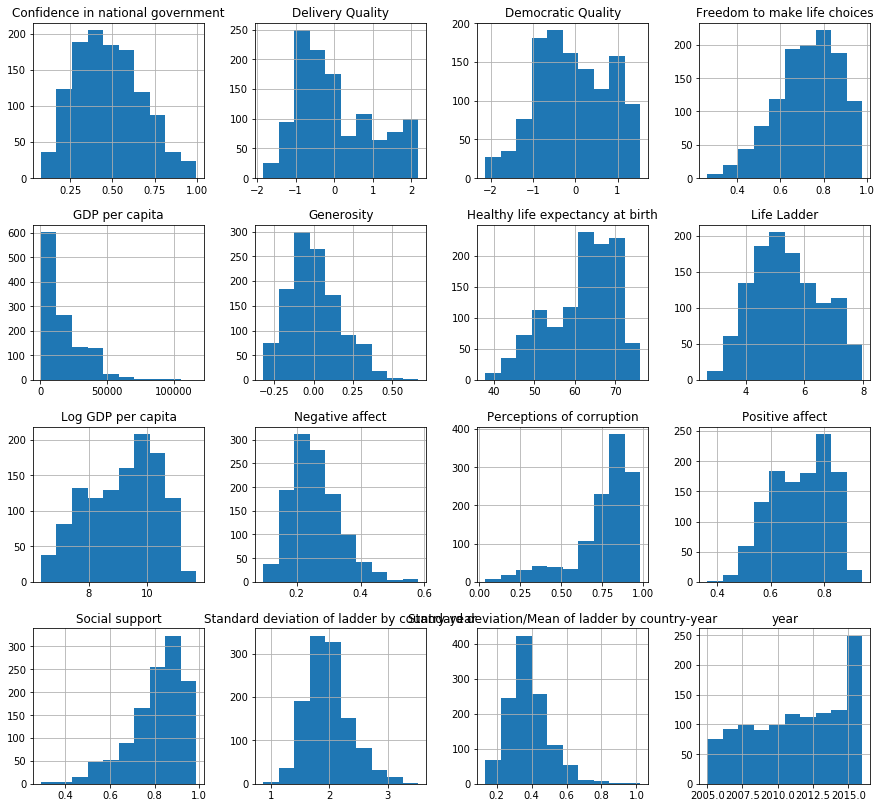

In [7]:
fig = plt.figure(figsize = (15,14)) # setting width and height in inches for our plots
ax = fig.gca() # gca for get current axes
data_all.hist(ax = ax); # histogram of our variables

Let's discuss a few of our variables a bit more; see handouts on World Happiness, GDP Per Capita, Life Ladder

To make sure we understand the life ladder and also for fun, let's do an exercise where everyone submits their Happiness Score. 
* For this class, we scored an average 5.9, which is above the midpoint. 


An obvious hypothesis to test is whether or not more developed countries have higher levels of happiness. In other words, does higher GDP suggest higher Life Ladder score. We first plot the data to see if there is a relationship between the two variables.

In [0]:
plt.figure(figsize=(10, 6)) # setting the visual size of our plot


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [0]:
data = data_all[data_all['year'] == 2016] # 2016 is the most recent year that we have data available for 


Looking at countries with highest GDP per capita

In [0]:
data[data['country'] == 'United States'] # looking at the US

,year,country,Life Ladder,GDP per capita,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
1122,2016,United States,6.8036,53341.808911,10.884476,0.896751,69.77092,0.757893,0.128466,0.73892,0.805674,0.264204,0.297206,0.728749,1.493718,1.972203,0.289876


In [0]:
data[data['country'] == 'Poland'] # looking at Poland

,year,country,Life Ladder,GDP per capita,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
873,2016,Poland,6.162076,26050.974101,10.16781,0.917399,68.572601,0.870708,-0.102383,0.847754,0.776625,0.223536,0.382713,0.674186,0.767235,1.845849,0.29955


% Exercise - You pick a country or two

In [0]:
data.sort_values(by = 'GDP per capita', ascending = False).head(10) # sorting by GDP per capita

,year,country,Life Ladder,GDP per capita,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
640,2016,Luxembourg,6.967341,94764.967613,11.459155,0.941261,72.201309,0.882365,0.005298,0.356336,0.757950,0.192301,0.678978,1.421889,1.801323,1.389065,0.199368
941,2016,Singapore,6.033481,81443.349551,11.307663,0.925128,75.720833,0.903736,0.125498,0.047311,0.823989,0.110942,0.930617,0.622578,2.072999,1.302088,0.215810
811,2016,Norway,7.596332,64179.059471,11.069432,0.959743,71.086586,0.954352,0.106471,0.409666,0.849626,0.209262,0.657646,1.374090,1.950178,1.579265,0.207898
520,2016,Ireland,7.040731,62991.887044,11.050761,0.958144,71.575096,0.874589,0.161004,0.398544,0.809203,0.211063,0.574740,1.085433,1.564082,1.843073,0.261773
1019,2016,Switzerland,7.458520,57430.079606,10.958323,0.927628,73.173759,0.933947,0.075722,0.301563,0.779471,0.206317,0.798537,1.390244,1.980969,1.694410,0.227178
460,2016,Hong Kong S.A.R. of China,5.498421,54279.205675,10.901896,0.832078,76.268028,0.799743,0.082168,0.402813,0.664093,0.213115,0.449610,0.555141,1.821866,1.819238,0.330866
1122,2016,United States,6.803600,53341.808911,10.884476,0.896751,69.770920,0.757893,0.128466,0.738920,0.805674,0.264204,0.297206,0.728749,1.493718,1.972203,0.289876
764,2016,Netherlands,7.540877,47302.682247,10.764322,0.925944,71.619995,0.907310,0.226168,0.433304,0.838432,0.214851,0.572273,1.184741,1.915634,1.281472,0.169937
1013,2016,Sweden,7.368744,46662.057958,10.750687,0.912061,72.745270,0.918036,0.131626,0.246182,0.815695,0.200607,0.485791,1.241600,1.976513,1.630500,0.221272
293,2016,Denmark,7.557783,45966.282152,10.735663,0.954452,71.312500,0.948231,0.127812,0.209893,0.836116,0.207583,0.467661,1.161069,1.900531,1.611470,0.213220


Life Ladder is higher as GDP increases; the growth slows down as GDP increases. There are some outliers with very high GDP (>$50,000) and not as high Life Ladder.

##### Let's log transform GDP per capita and see if any pattern emmerges 



```
# This is formatted as code
```

The log transform is already provided to us. We can simply plug in the transformed column and recreate the above plot.

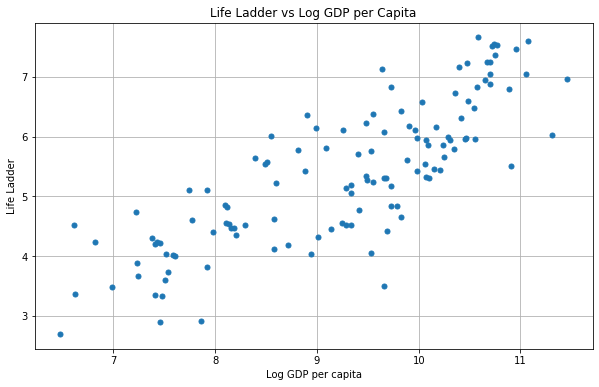

In [0]:
plt.figure(figsize=(10, 6)) # figure size 
plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=5) # plotting two variables
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Life Ladder vs Log GDP per Capita")
plt.grid()

<h2>Fit a Linear Model</h2>

Our goal in this section is to find a linear model between Log GDP per capita and Life Ladder.  The linear model has the form

$$ \mathrm{LifeLadder} = a \cdot \mathrm{LogGDPPerCapita} + b $$

We call $a$ the <b>slope</b> and $b$ the <b>intercept</b>. 

<h2>Check the Goodness of Fit</h2>

Now that we have our linear model, how do we tell if it's any good?  While we computed the slope and intercept by hand above, let's try doing this within the Python package statsmodels, which will give us a few extra things for free:

In [12]:
import statsmodels.api as sm
data["Constant"] = 1
m = sm.OLS(data["Life Ladder"], data[["Log GDP per capita", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           2.28e-30
Time:                        13:31:42   Log-Likelihood:                -129.99
No. Observations:                 124   AIC:                             264.0
Df Residuals:                     122   BIC:                             269.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Log GDP per capita     0.7861      0.051     15.392      0.000       0.685       0.887
Constant              -1.8939      0.476     -3.977      0.000      -2.837      -0.951
==============================================================================
Omnibus:                        1.306   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.379
Skew:                          -0.231   Prob(JB):                        0.502
Kurtosis:                       2.769   Cond. No.                         71.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While there are lots of numbers here, a few confirm what we could probably tell from linear inspection: overall, this is a good model:

- The <b>R-squared</b>, which is the squared correlation coefficient, is 66.0%, which is pretty good for a linear model.  Just how good is given by the <b>F-statistic</b>, which roughly tells us how implausible it would be to see such a high correlation between the Log GDP per capita and Life Ladder that we happen to have here, under the assumption that there is actually no correlation between the two.  The actual probability is given by the <b>P-value</b> of the F-statistic, which is less than $10^{-29}$.  This means the probability of seeing a relationship this strong if in truth one did not exist is less than the probability that you could pick one atom out of all of the atoms in the universe.
- While the R-squared gives an idea of how good the overall linear model is, we can look at the next table to see how much the Log GDP per capita and the intercept (constant) contribute to the model.  For example, maybe we don't need to bother with a constant term at all and just looking at the $a \cdot \mathrm{(Log\ GDP\ per\ capita)}$ part of the model would be good enough.  However, the p-values on both of these variables are quite small, which tells us that both pieces of the model have a statistically significant contribution.

#### Linear Model Assumptions and Residual Analysis



The linear model some assumptions (there are others, but these are two of the most important):

- <b>Homoskedasticity</b>: This is a fancy way of saying that the variance of the errors is the same no matter what the value of the predictor variable is.  In other words, the predicted range of Life Ladder is about as wide a country with 100 GDP or a country with 10,000 GDP.
- <b>Independence of errors</b>: This means that knowing how much the model gets Life Ladder of one country wrong shouldn't tell us anything about how much the model gets wrong the Life Ladder of other countries.

Both of these assumptions are quite strong and **rarely hold in practice**: the goal is more to make sure they hold reasonably well.  Let's look at the residuals to see how well they hold:

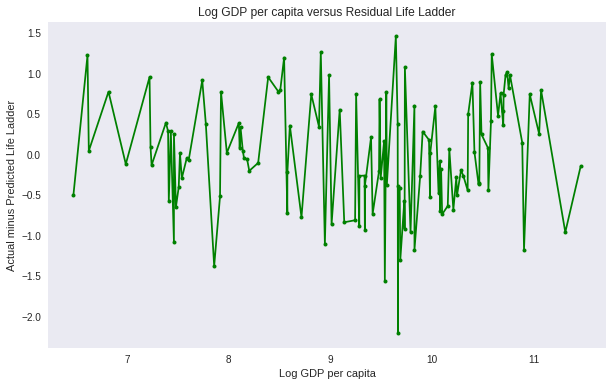

In [0]:
data["Residual"] = m.resid
data.sort_values('Log GDP per capita', inplace=True)
fig = plt.figure(figsize=(10, 6))
plt.plot(data["Log GDP per capita"], data["Residual"], "go-", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Actual minus Predicted Life Ladder")
plt.title("Log GDP per capita versus Residual Life Ladder")
plt.grid()

Let's study what factors explain happiness the best. How does Generosity do? 


In [60]:
np.corrcoef([data["Life Ladder"], data["Generosity"]])

array([[1.        , 0.10922311],
       [0.10922311, 1.        ]])

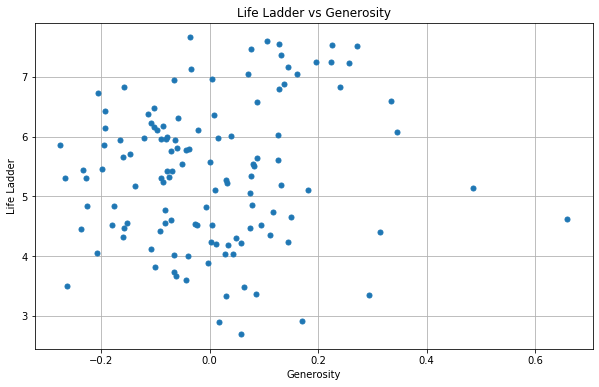

In [61]:
plt.figure(figsize=(10, 6)) # figure size 
plt.plot(data["Generosity"], data["Life Ladder"], "o", markersize=5) # plotting two variables
plt.xlabel("Generosity")
plt.ylabel("Life Ladder")
plt.title("Life Ladder vs Generosity")
plt.grid()

In [54]:
m = sm.OLS(data["Life Ladder"], data[["Generosity", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.473
Date:                Sat, 14 Dec 2019   Prob (F-statistic):              0.227
Time:                        14:02:19   Log-Likelihood:                -196.15
No. Observations:                 124   AIC:                             396.3
Df Residuals:                     122   BIC:                             401.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Generosity     0.8351      0.688      1.214      0.227      -0.527       2.197
Constant       5.3708      0.107     50.401      0.000       5.160       5.582
==============================================================================
Omnibus:                        6.613   Durbin-Watson:                   0.844
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                3.176
Skew:                          -0.096   Prob(JB):                        0.204
Kurtosis:                       2.240   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's study additional variables and how they do ... 

In [55]:
np.corrcoef([data["Life Ladder"], data["Log GDP per capita"],data["Social support"], data["Generosity"]])

array([[ 1.        ,  0.81246416,  0.75500503,  0.10922311],
       [ 0.81246416,  1.        ,  0.72256569, -0.06219023],
       [ 0.75500503,  0.72256569,  1.        , -0.03837102],
       [ 0.10922311, -0.06219023, -0.03837102,  1.        ]])

In [0]:
names = ['Life Ladder', 'Log GDP per capita', 'Social support', "Generosity"]

In [0]:
corr=np.corrcoef([data["Life Ladder"], data["Log GDP per capita"],data["Social support"], data["Generosity"]])

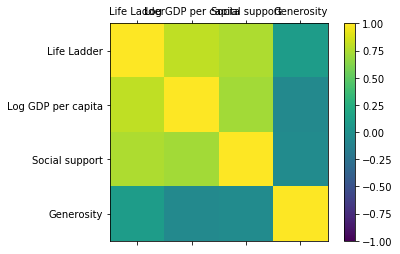

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Let's try and make our best linear regression model using a single variable ... 


Let's spend some time on Multiple Regression

In [45]:
m = sm.OLS(data["Life Ladder"], data[["Log GDP per capita", "Social support", "Generosity", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     92.88
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           1.16e-35
Time:                        13:52:54   Log-Likelihood:                -109.08
No. Observations:                 124   AIC:                             228.2
Df Residuals:                     119   BIC:                             242.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Log GDP per capita     0.4528      0.074      6.113      0.000       0.306       0.599
Social support         3.0058      0.604      4.978      0.000       1.810       4.201
Democratic Quality     0.2289      0.089      2.563      0.012       0.052       0.406
Generosity             1.0978      0.349      3.149      0.002       0.408       1.788
Constant              -1.2459      0.589     -2.114      0.037      -2.413      -0.079
==============================================================================
Omnibus:                        1.059   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.774
Skew:                          -0.188   Prob(JB):                        0.679
Kurtosis:                       3.093   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

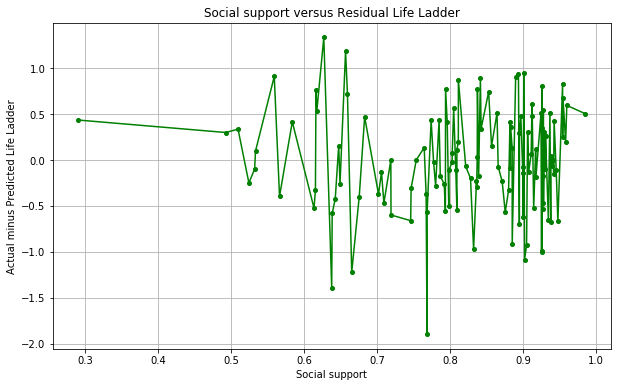

In [26]:
data["Residual"] = m.resid
data.sort_values('Social support', inplace=True)
fig = plt.figure(figsize=(10, 6))
plt.plot(data["Social support"], data["Residual"], "go-", markersize=4)
plt.xlabel("Social support")
plt.ylabel("Actual minus Predicted Life Ladder")
plt.title("Social support versus Residual Life Ladder")
plt.grid()